https://www.kaggle.com/shubh0799/churn-modelling

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
df = pd.read_csv("Churn_Modelling.csv")

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [174]:
df.shape

(10000, 14)

**1000 samples, 14 feature variables**

**Remove the first 3 columns**

In [175]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Description

In [291]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [177]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Continuous: CreditScore, Age, Balance, EstimatedSalary**

**Ordinal: Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember**

**Nominal: Geography**

In [178]:
cor_matrix=df.corr().round(decimals=1)
cor_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
Age,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.1,-0.0,0.3
Tenure,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
Balance,0.0,0.0,-0.0,1.0,-0.3,-0.0,-0.0,0.0,0.1
NumOfProducts,0.0,-0.0,0.0,-0.3,1.0,0.0,0.0,0.0,-0.0
HasCrCard,-0.0,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0
IsActiveMember,0.0,0.1,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.2
EstimatedSalary,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0
Exited,-0.0,0.3,-0.0,0.1,-0.0,-0.0,-0.2,0.0,1.0


<AxesSubplot:>

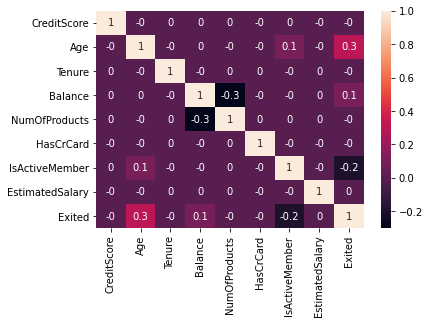

In [179]:
import seaborn as sns
sns.heatmap(cor_matrix, annot = True)

## EDA

### Histogram

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>]], dtype=object)

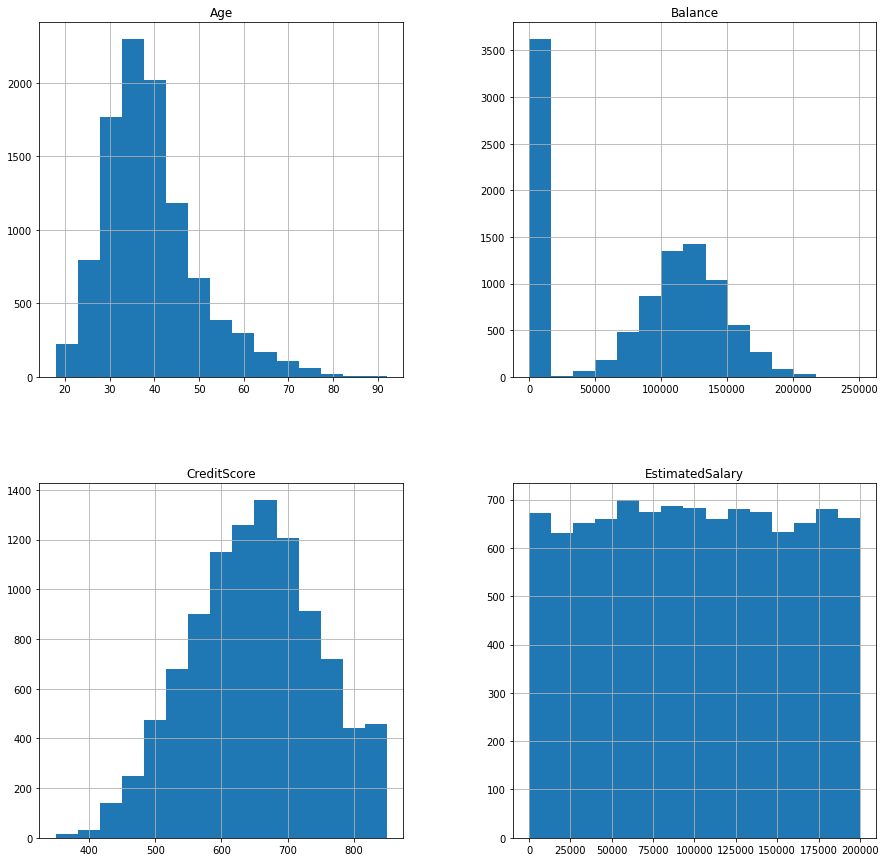

In [180]:
df.hist(["CreditScore", "Age", "Balance", "EstimatedSalary"], layout=(2,2), figsize=(15, 15), bins=15)

### Box plot

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


CreditScore           AxesSubplot(0.125,0.536818;0.352273x0.343182)
Age                AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Balance                  AxesSubplot(0.125,0.125;0.352273x0.343182)
EstimatedSalary       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

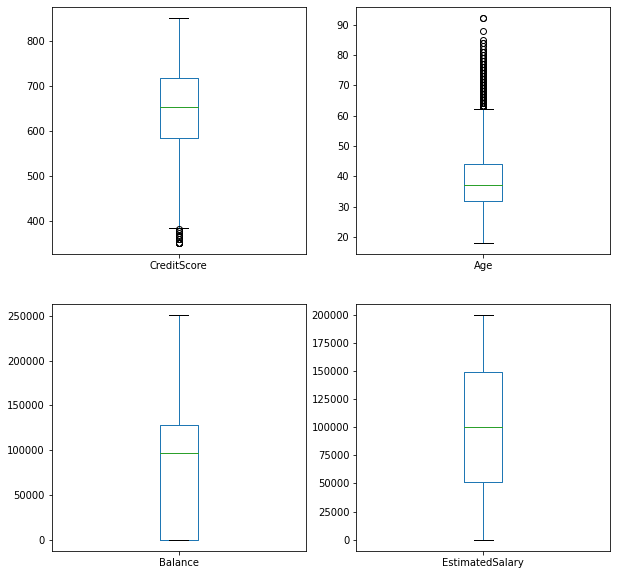

In [181]:
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].plot.box(subplots = True, layout=(2,2), figsize=(10, 10))

### Bar chart

<AxesSubplot:>

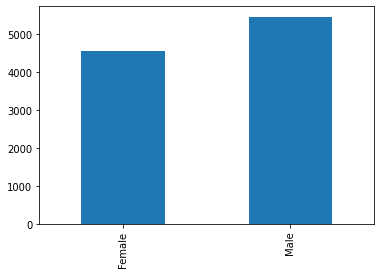

In [182]:
df['Gender'].value_counts().sort_index().plot.bar()

<AxesSubplot:xlabel='Gender'>

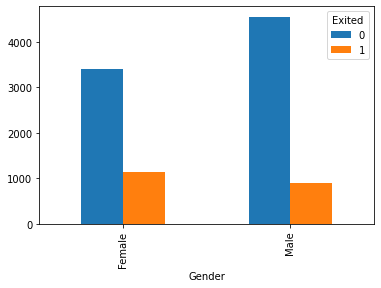

In [183]:
pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar')

<AxesSubplot:>

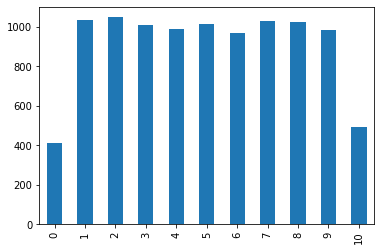

In [184]:
df['Tenure'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

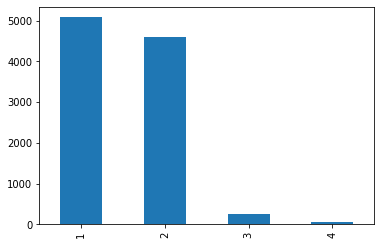

In [185]:
df['NumOfProducts'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

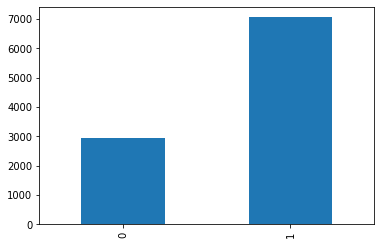

In [186]:
df['HasCrCard'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

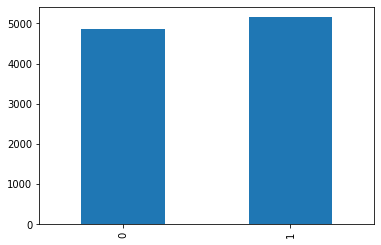

In [187]:
df['IsActiveMember'].value_counts().sort_index().plot.bar()

### Pie chart

<AxesSubplot:ylabel='Geography'>

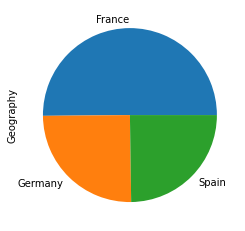

In [188]:
df['Geography'].value_counts().plot.pie()

In [189]:
for i in ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']:
    z_score = stats.zscore(df[i])
    #print(len(df[np.abs(stats.zscore(df[i])) > 3][i]))
    print(i, ':', len(z_score[np.abs(z_score) > 3]))

8
CreditScore : 8
133
Age : 133
0
Balance : 0
0
EstimatedSalary : 0


# Data Cleaning and Transformation

### Gender

In [190]:
df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0)

df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0


### Geography

In [191]:
dummy = pd.get_dummies(df['Geography'])

dummy.head(10)

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,1,0
8,1,0,0
9,1,0,0


In [192]:
df_new = pd.concat([df, dummy], axis=1)

df_new.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [193]:
df_new.drop(['Geography', 'Spain'], axis=1, inplace=True)

df_new.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0


In [194]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int32  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  uint8  
 11  Germany          10000 non-null  uint8  
dtypes: float64(2), int32(1), int64(7), uint8(2)
memory usage: 761.8 KB


## Check outliers

In [195]:
from scipy import stats

In [196]:
for i in df_new.columns:
    print(i, ':', len(df_new[np.abs(stats.zscore(df_new[i])) > 3][i]))

CreditScore : 8
Gender : 0
Age : 133
Tenure : 0
Balance : 0
NumOfProducts : 60
HasCrCard : 0
IsActiveMember : 0
EstimatedSalary : 0
Exited : 0
France : 0
Germany : 0


In [197]:
df_final = df_new[(np.abs(stats.zscore(df_new)) < 3).all(axis=1)]

df_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


**201 rows has been deleted**

**re-index**

In [198]:
index=pd.Index([i for i in range(9799)])

df_final.index = index

df_final

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9794,771,1,39,5,0.00,2,1,0,96270.64,0,1,0
9795,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0
9796,709,0,36,7,0.00,1,0,1,42085.58,1,1,0
9797,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1


# Build Model

In [199]:
from sklearn import model_selection
from sklearn.metrics import classification_report # Reporting metric
from sklearn.metrics import confusion_matrix # classifies predicted values as TP, TN, FP, FN
from sklearn.metrics import accuracy_score # calculates accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [200]:
X = df_final.drop('Exited', axis=1)
y = df_final['Exited']

In [201]:
validation_size = 0.25
seed = 7
scoring = 'accuracy'

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [202]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR: 0.794666 (0.017161)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LDA: 0.821609 (0.016795)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN: 0.766501 (0.016740)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


CART: 0.785822 (0.012584)
NB: 0.794803 (0.018506)


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SVM: 0.798477 (0.018555)


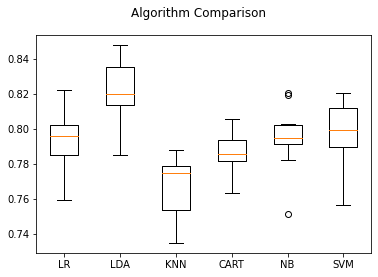

In [203]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**->  LR, LDA, SVM**

# Logistic Regression

In [204]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Accuracy:', lr.score(X_test, y_test))

Accuracy: 0.8028571428571428


In [239]:
predict_lr = lr.predict(X_test)
predict_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [215]:
lr.predict_proba(X_test)

array([[0.92855401, 0.07144599],
       [0.80125258, 0.19874742],
       [0.77694812, 0.22305188],
       ...,
       [0.62276663, 0.37723337],
       [0.73360707, 0.26639293],
       [0.70167381, 0.29832619]])

In [224]:
print(lr.intercept_)
pd.DataFrame(lr.coef_, columns=X.columns, index=['Coef'])

[-0.00025023]


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
Coef,-0.005581,-0.001271,0.053135,-0.002197,0.000003,-0.001099,-0.000235,-0.00169,-0.000001,-0.001013,0.001153


**Confusion matrix and Report**

In [243]:
cm_lr = confusion_matrix(y_test, predict_lr)

cm_lr

array([[1920,   53],
       [ 430,   47]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for LR')

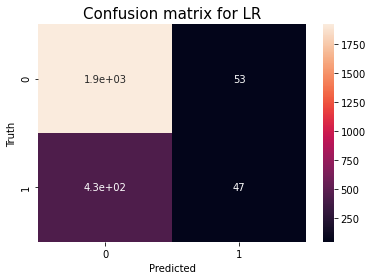

In [251]:
#plt.figure(figsize = (10, 7))
sn.heatmap(cm_lr, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix for LR', fontsize=15)

In [247]:
print(classification_report(y_test, predict_lr))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1973
           1       0.47      0.10      0.16       477

    accuracy                           0.80      2450
   macro avg       0.64      0.54      0.53      2450
weighted avg       0.75      0.80      0.75      2450



# Linear Discriminant Analysis

In [248]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy:', lda.score(X_test, y_test))

Accuracy: 0.8220408163265306


In [249]:
predict_lda = lda.predict(X_test)
predict_lda

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Confusion matrix and Report**

In [250]:
cm_lda = confusion_matrix(y_test, predict_lda)

cm_lda

array([[1884,   89],
       [ 347,  130]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for LR')

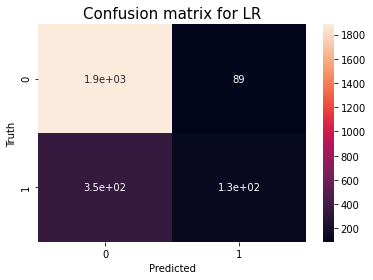

In [252]:
sn.heatmap(cm_lda, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix for LR', fontsize=15)

In [253]:
print(classification_report(y_test, predict_lda))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      1973
           1       0.59      0.27      0.37       477

    accuracy                           0.82      2450
   macro avg       0.72      0.61      0.63      2450
weighted avg       0.80      0.82      0.79      2450



# Support vector machine

In [259]:
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.8053061224489796


In [261]:
predict_svm = svm.predict(X_test)
predict_svm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Confusion matrix and Report**

In [263]:
cm_svm = confusion_matrix(y_test, predict_svm)

cm_svm

array([[1973,    0],
       [ 477,    0]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for SVM')

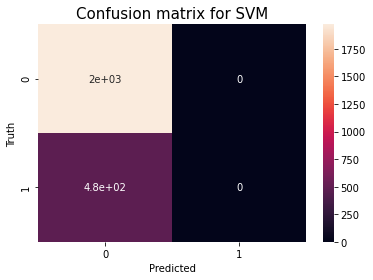

In [264]:
sn.heatmap(cm_svm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix for SVM', fontsize=15)

In [266]:
print(classification_report(y_test, predict_svm))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1973
           1       0.00      0.00      0.00       477

    accuracy                           0.81      2450
   macro avg       0.40      0.50      0.45      2450
weighted avg       0.65      0.81      0.72      2450



# Dealing with Accuracy

In [297]:
a = confusion_matrix(y_train, lda.predict(X_train))

a

array([[5619,  249],
       [1061,  420]], dtype=int64)

In [298]:
df_ex = X_train.copy()

df_ex

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany
4724,786,0,32,6,114512.59,1,1,0,15796.66,0,0
5984,736,1,50,9,116309.01,1,1,0,185360.40,0,1
1617,583,1,47,5,102562.23,1,1,0,92708.10,0,0
3399,697,0,37,7,168066.87,1,1,0,35450.53,0,0
6333,749,1,30,1,0.00,2,0,1,126551.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
919,661,1,39,6,132628.98,1,0,0,38812.67,0,0
4307,479,1,24,6,107637.97,2,0,1,169505.83,0,1
5699,547,1,43,1,92350.36,1,0,1,80262.91,1,0
537,842,0,44,2,112652.08,2,1,0,126644.98,0,0


In [299]:
len(lda.predict(X_train))

7349

In [300]:
df_ex['Truth'] = y_train
df_ex['predict'] = lda.predict(X_train)
df_ex

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Truth,predict
4724,786,0,32,6,114512.59,1,1,0,15796.66,0,0,0,0
5984,736,1,50,9,116309.01,1,1,0,185360.40,0,1,1,1
1617,583,1,47,5,102562.23,1,1,0,92708.10,0,0,0,0
3399,697,0,37,7,168066.87,1,1,0,35450.53,0,0,0,0
6333,749,1,30,1,0.00,2,0,1,126551.65,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,661,1,39,6,132628.98,1,0,0,38812.67,0,0,0,0
4307,479,1,24,6,107637.97,2,0,1,169505.83,0,1,0,0
5699,547,1,43,1,92350.36,1,0,1,80262.91,1,0,0,0
537,842,0,44,2,112652.08,2,1,0,126644.98,0,0,0,0


In [301]:
g = lda.predict_proba(X_train)
df_ex['pro_0'] = g[:, 0]
df_ex['pro_1'] = g[:, 1]

df_ex

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Truth,predict,pro_0,pro_1
4724,786,0,32,6,114512.59,1,1,0,15796.66,0,0,0,0,0.841315,0.158685
5984,736,1,50,9,116309.01,1,1,0,185360.40,0,1,1,1,0.365139,0.634861
1617,583,1,47,5,102562.23,1,1,0,92708.10,0,0,0,0,0.651070,0.348930
3399,697,0,37,7,168066.87,1,1,0,35450.53,0,0,0,0,0.743703,0.256297
6333,749,1,30,1,0.00,2,0,1,126551.65,1,0,0,0,0.979063,0.020937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,661,1,39,6,132628.98,1,0,0,38812.67,0,0,0,0,0.806474,0.193526
4307,479,1,24,6,107637.97,2,0,1,169505.83,0,1,0,0,0.961040,0.038960
5699,547,1,43,1,92350.36,1,0,1,80262.91,1,0,0,0,0.879914,0.120086
537,842,0,44,2,112652.08,2,1,0,126644.98,0,0,0,0,0.685466,0.314534


In [305]:
df_ex.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,7349.0,648.893999,96.398148,365.000000,582.000000,650.000000,716.000000,850.000000
Gender,7349.0,0.547830,0.497741,0.000000,0.000000,1.000000,1.000000,1.000000
Age,7349.0,38.404409,9.618966,18.000000,32.000000,37.000000,43.000000,70.000000
Tenure,7349.0,5.061369,2.879765,0.000000,3.000000,5.000000,8.000000,10.000000
Balance,7349.0,76122.973249,62401.488920,0.000000,0.000000,96645.540000,127278.310000,250898.090000
NumOfProducts,7349.0,1.514356,0.550119,1.000000,1.000000,1.000000,2.000000,3.000000
HasCrCard,7349.0,0.702408,0.457230,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,7349.0,0.511226,0.499908,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,7349.0,99630.945852,57269.571528,11.580000,51229.170000,99654.130000,147878.050000,199992.480000
France,7349.0,0.498299,0.500031,0.000000,0.000000,0.000000,1.000000,1.000000


In [302]:
check = df_ex[(df_ex['Truth'] != df_ex['predict']) & (df_ex['Truth'] == 1)]

check

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Truth,predict,pro_0,pro_1
3587,750,0,37,6,0.00,1,1,1,117948.00,1,0,1,0,0.908587,0.091413
8713,435,1,37,8,114346.30,1,0,1,980.93,0,1,1,0,0.837213,0.162787
199,711,0,38,2,129022.06,2,1,1,14374.86,1,0,1,0,0.917401,0.082599
6080,497,0,29,4,85646.81,1,0,0,63233.02,1,0,1,0,0.862936,0.137064
2504,524,1,50,4,0.00,2,1,1,31840.59,1,0,1,0,0.868835,0.131165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,376,0,46,6,0.00,1,1,0,157333.69,1,0,1,0,0.553432,0.446568
7651,579,1,43,2,145843.82,1,1,1,198402.37,0,0,1,0,0.863677,0.136323
8504,542,0,35,9,127543.11,2,1,0,468.94,0,1,1,0,0.675359,0.324641
3516,577,1,43,8,79757.21,1,1,0,135650.72,0,0,1,0,0.742377,0.257623


In [304]:
check.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,1061.0,645.997172,98.229684,365.000000,580.000000,647.00000,714.000000,850.000000
Gender,1061.0,0.482564,0.499932,0.000000,0.000000,0.00000,1.000000,1.000000
Age,1061.0,41.117813,8.280021,18.000000,35.000000,41.00000,47.000000,67.000000
Tenure,1061.0,5.026390,2.900433,0.000000,3.000000,5.00000,8.000000,10.000000
Balance,1061.0,84729.499246,62104.789687,0.000000,0.000000,105173.99000,130694.890000,250898.090000
NumOfProducts,1061.0,1.471254,0.717946,1.000000,1.000000,1.00000,2.000000,3.000000
HasCrCard,1061.0,0.691800,0.461967,0.000000,0.000000,1.00000,1.000000,1.000000
IsActiveMember,1061.0,0.435438,0.496048,0.000000,0.000000,0.00000,1.000000,1.000000
EstimatedSalary,1061.0,100923.401282,57740.103287,11.580000,52583.790000,100496.84000,151648.660000,199725.390000
France,1061.0,0.462771,0.498847,0.000000,0.000000,0.00000,1.000000,1.000000


D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'France'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Germany'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>],
       [<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Truth'}>,
        <AxesSubplot:title={'center':'predict'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

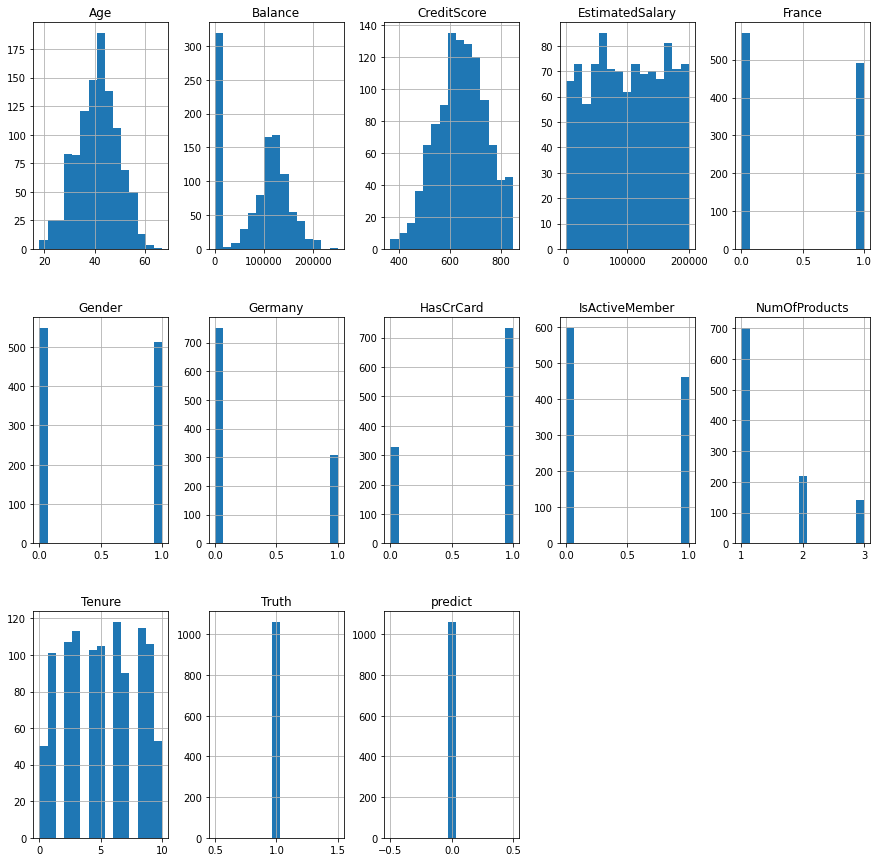

In [287]:
check.hist(layout=(3,5), figsize=(15, 15), bins=15)

D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
D:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


CreditScore           AxesSubplot(0.125,0.657941;0.133621x0.222059)
Gender             AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Age                 AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Tenure             AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Balance            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
NumOfProducts         AxesSubplot(0.125,0.391471;0.133621x0.222059)
HasCrCard          AxesSubplot(0.285345,0.391471;0.133621x0.222059)
IsActiveMember      AxesSubplot(0.44569,0.391471;0.133621x0.222059)
EstimatedSalary    AxesSubplot(0.606034,0.391471;0.133621x0.222059)
France             AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Germany                  AxesSubplot(0.125,0.125;0.133621x0.222059)
Truth                 AxesSubplot(0.285345,0.125;0.133621x0.222059)
predict                AxesSubplot(0.44569,0.125;0.133621x0.222059)
dtype: object

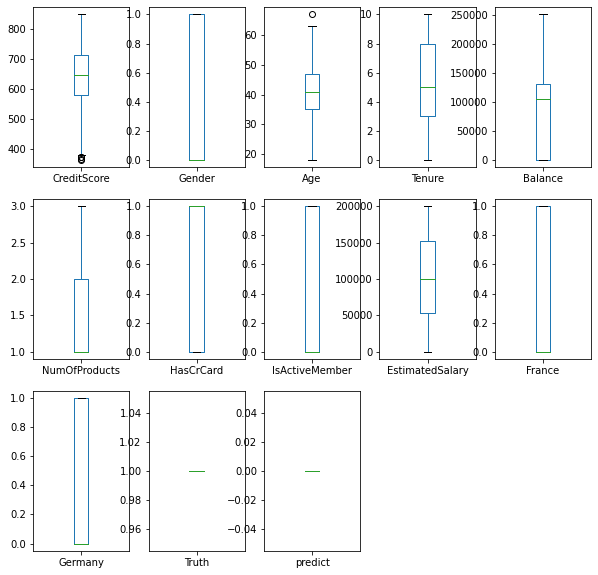

In [290]:
check.plot.box(subplots = True, layout=(3,5), figsize=(10, 10))

In [295]:
g = lda.predict_proba(X_train)

g

array([[0.84131516, 0.15868484],
       [0.36513906, 0.63486094],
       [0.65107036, 0.34892964],
       ...,
       [0.8799143 , 0.1200857 ],
       [0.68546575, 0.31453425],
       [0.97565431, 0.02434569]])

In [296]:
df_ex['pro_0'] = g[:, 0]
df_ex['pro_1'] = g[:, 1]

df_ex

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Truth,predict,pro_0,pro_1
4724,786,0,32,6,114512.59,1,1,0,15796.66,0,0,0,0,0.841315,0.158685
5984,736,1,50,9,116309.01,1,1,0,185360.40,0,1,1,1,0.365139,0.634861
1617,583,1,47,5,102562.23,1,1,0,92708.10,0,0,0,0,0.651070,0.348930
3399,697,0,37,7,168066.87,1,1,0,35450.53,0,0,0,0,0.743703,0.256297
6333,749,1,30,1,0.00,2,0,1,126551.65,1,0,0,0,0.979063,0.020937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,661,1,39,6,132628.98,1,0,0,38812.67,0,0,0,0,0.806474,0.193526
4307,479,1,24,6,107637.97,2,0,1,169505.83,0,1,0,0,0.961040,0.038960
5699,547,1,43,1,92350.36,1,0,1,80262.91,1,0,0,0,0.879914,0.120086
537,842,0,44,2,112652.08,2,1,0,126644.98,0,0,0,0,0.685466,0.314534
